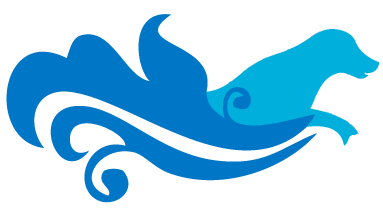

## Breeze Runing enviroments

Breeze is a numerical processing library for Scala. http://www.scalanlp.org

In [ ]:
import  $ivy.`org.scalanlp::breeze:1.0`

## breeze.linalg._

In [ ]:
import breeze.linalg._  

In [ ]:
val a = DenseVector(List(1,2,3,4,5,6))
val b = DenseVector(List(0.1,0.2,0.3,0.4,0.5,0.6))

## breeze.numerics._

In [ ]:
import breeze.numerics._

## breeze.math._

In [ ]:
import breeze.math._

In [ ]:
val a = 2 + 3*i

e^{\frac{\pi}{4}j} 

In [ ]:
val b = (scala.math.Pi*i/4).exp 

## FixPoint

In [ ]:
case class QFormat(width: Int, fraction: Int, signed: Boolean) 
object FixTo{
  def apply(x: Int, q: QFormat): Double = x + 0.00 
  def apply(x: List[Int], q: QFormat): List[Double] = x.map(_+0.00)
  def apply(x: List[Long], q: QFormat): List[Double] = x.map(_+0.00)
}

In [ ]:
FixTo(2,QFormat(16,2,false))
FixTo(List(3,2,1,0),QFormat(16,2,false))

In [ ]:
object MyTransform{
  def apply(x: Int ): Double              = x + 0.00 
  def apply(x: List[Int] ): List[Double]  = x.map(_+0.00)
  def apply(x: List[Double] ): List[Double] = x.map(_+0.00)
}

## FFT

In [ ]:
import scala.math._

case class Complex(re: Double, im: Double) {
    def +(x: Complex): Complex = Complex(re + x.re, im + x.im)
    def -(x: Complex): Complex = Complex(re - x.re, im - x.im)
    def *(x: Double):  Complex = Complex(re * x, im * x)
    def *(x: Complex): Complex = Complex(re * x.re - im * x.im, re * x.im + im * x.re)
    def /(x: Double):  Complex = Complex(re / x, im / x)
 
    override def toString(): String = {
        val a = "%1.3f".format(re)
        val b = "%1.3f".format(abs(im))
        (a,b) match {
            case (_, "0.000") => a
            case ("0.000", _) => b + "j"
            case (_, _) if im > 0 => a + " + " + b + "j"
            case (_, _) => a + " - " + b + "j"
        }
    }
}

def Myexp(c: Complex) : Complex = {
    val r = (cosh(c.re) + sinh(c.re))
    Complex(cos(c.im), sin(c.im)) * r
}

In [ ]:
val a = Complex(2,-3)
println(a)
a*(Pi*7/3)
Myexp(Complex(0.0,Pi/2))

In [ ]:
def _fft(cSeq: Seq[Complex], direction: Complex, scalar: Int): Seq[Complex] = {
    if (cSeq.length == 1) {
        return cSeq
    }
    val n = cSeq.length
    assume(n % 2 == 0, "The Cooley-Tukey FFT algorithm only works when the length of the input is even.")
 
    val evenOddPairs = cSeq.grouped(2).toSeq
    val evens = _fft(evenOddPairs map (_(0)), direction, scalar)
    val odds  = _fft(evenOddPairs map (_(1)), direction, scalar)
 
    def leftRightPair(k: Int): Pair[Complex, Complex] = {
        val base = evens(k) / scalar
        val offset = e(direction * (Pi * k / n)) * odds(k) / scalar
        (base + offset, base - offset)
    }
 
    val pairs = (0 until n/2) map leftRightPair
    val left  = pairs map (_._1)
    val right = pairs map (_._2)
    left ++ right
}
 
def  fft(cSeq: Seq[Complex]): Seq[Complex] = _fft(cSeq, Complex(0,  2), 1)
def rfft(cSeq: Seq[Complex]): Seq[Complex] = _fft(cSeq, Complex(0, -2), 2)

In [ ]:
val data = Seq(Complex(1,0), Complex(1,0), Complex(1,0), Complex(1,0), 
               Complex(0,0), Complex(0,2), Complex(0,0), Complex(0,0))
 
println(fft(data))
println(rfft(fft(data)))

In [ ]:
2 toDouble

## Creat Your owner Complex
```scala
2 + 3*j     //Complex(2.0, 3.0)
3.001 - 7*j //Complex(3.001, -7.0)
```

In [ ]:
trait jbase
object j extends jbase
case class image(value: Double)
implicit class compleInt(x: Int) {
    def *(y: jbase) = image(x toDouble)
}
implicit class compleDouble(x: Double) {
    def *(y: jbase) = image(x)
}
implicit class DoubleExpand(x: Double) {
    def +(that: image) = Complex(x,that.value)
    def -(that: image) = Complex(x,-that.value)
}
implicit class intExpand(x: Int) {
    def +(that: image) = Complex(x toDouble,that.value)
    def -(that: image) = Complex(x toDouble,-that.value)
}

In [ ]:
val a = 2 + 3.2*j 
val b = 3.001 -7*j
val c = a * b
println(c)

In [ ]:
val data = Seq(3+2*j,5+1*j,13.01-3.2*j,4+1*j,0-3*j,1+1*j,2-3*j,4.111-2*j)
println(fft(data))
println(rfft(fft(data)))

In [ ]:
import scala.math._
cosh(1)

In [ ]:
(0 to 15).map(x=>atan(pow(2,-x))).map(360*_/(2*Pi)).zipWithIndex

In [ ]:
val a = (0 to 20) toList
val c = List.tabulate(4,5)((x,y)=>a(x+4*y))

In [ ]:
def log10(x: Double) = scala.math.log(x)/scala.math.log(10)

In [ ]:
val snr = -3
val gaindB = 10*log10(1 + scala.math.pow(10, -snr/10.0))